# PUMS dataset

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pums = pd.read_csv('pums.csv', na_values=['notknown'])

Data is structured in 15 variables (already encoded as numerical values) and 1 target variable.

In [3]:
pums.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,True
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,False
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,False
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,True
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,True


The number of entries is 746,336.

In [4]:
pums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746336 entries, 0 to 746335
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEP      746336 non-null  float64
 1   SCHL      709133 non-null  float64
 2   MAR       746336 non-null  float64
 3   RELP      709213 non-null  float64
 4   DIS       746336 non-null  float64
 5   ESP       746336 non-null  float64
 6   CIT       709287 non-null  float64
 7   MIG       746336 non-null  float64
 8   MIL       746336 non-null  float64
 9   ANC       746336 non-null  float64
 10  NATIVITY  708813 non-null  float64
 11  DEAR      708974 non-null  float64
 12  DEYE      709267 non-null  float64
 13  DREM      746336 non-null  float64
 14  SEX       746336 non-null  float64
 15  ESR       746336 non-null  bool   
dtypes: bool(1), float64(15)
memory usage: 86.1 MB


## Data preparation

In [5]:
from sklearn.preprocessing import LabelEncoder

We have to encode the boolean target variable to make it numerical.

In [6]:
le = LabelEncoder()
NESR = le.fit_transform(pums['ESR'])
pums['ESR'] = pd.Series(NESR)

In [7]:
pums.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,0
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,0
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,1
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1


# Statistics

In [8]:
pums.describe()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
count,746336.000000,709133.000000,746336.000000,709213.000000,746336.000000,746336.000000,709287.000000,746336.000000,746336.000000,746336.000000,708813.000000,708974.000000,709267.000000,746336.000000,746336.000000,746336.000000
mean,40.378314,15.426601,2.995578,2.679022,1.866040,0.617611,1.693518,1.247413,3.080612,1.757976,1.192635,1.960921,1.975131,1.844122,1.507907,0.453035
std,23.374484,6.381558,1.865125,4.336577,0.340609,1.678300,1.390452,0.675038,1.608065,1.097682,0.394369,0.193783,0.155727,0.485527,0.499938,0.497790
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,20.000000,13.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,40.000000,17.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,59.000000,20.000000,5.000000,2.000000,2.000000,0.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,94.000000,24.000000,5.000000,17.000000,2.000000,8.000000,5.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [9]:
pums.corr()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
AGEP,1.000000,0.526318,-0.652526,-0.160553,-0.319932,-0.495892,0.136805,-0.094053,0.610013,-0.075151,0.159861,-0.240264,-0.127749,0.297545,0.045604,0.108214
SCHL,0.526318,1.000000,-0.437045,-0.106178,-0.034417,-0.534254,0.013117,0.051095,0.710749,-0.055516,0.026687,-0.036743,-0.002851,0.508846,0.020629,0.433160
MAR,-0.652526,-0.437045,1.000000,0.324343,0.084751,0.395482,-0.197440,0.091173,-0.486286,0.067081,-0.212588,0.100159,0.034025,-0.243272,-0.037797,-0.236155
RELP,-0.160553,-0.106178,0.324343,1.000000,-0.090447,0.028915,-0.007710,0.202360,-0.026641,0.051846,-0.018830,-0.004358,-0.043709,-0.090742,-0.041623,-0.141054
DIS,-0.319932,-0.034417,0.084751,-0.090447,1.000000,0.093754,0.037943,-0.000815,-0.102686,-0.006058,0.031085,0.512855,0.405873,0.190759,-0.004698,0.209605
ESP,-0.495892,-0.534254,0.395482,0.028915,0.093754,1.000000,-0.139069,-0.016679,-0.650507,0.037561,-0.145389,0.063005,0.038179,-0.286680,-0.014166,-0.323080
CIT,0.136805,0.013117,-0.197440,-0.007710,0.037943,-0.139069,1.000000,-0.010506,0.210177,-0.154963,0.975068,0.025188,-0.000428,0.109111,0.011768,0.108761
MIG,-0.094053,0.051095,0.091173,0.202360,-0.000815,-0.016679,-0.010506,1.000000,0.041475,0.032566,-0.018573,0.016514,-0.003608,0.034611,-0.011250,0.020511
MIL,0.610013,0.710749,-0.486286,-0.026641,-0.102686,-0.650507,0.210177,0.041475,1.000000,-0.072090,0.217732,-0.041023,-0.047215,0.391905,0.084040,0.455615
ANC,-0.075151,-0.055516,0.067081,0.051846,-0.006058,0.037561,-0.154963,0.032566,-0.072090,1.000000,-0.160468,0.000405,0.001006,-0.050561,0.003481,-0.022187


In [10]:
round(pums.corr(),2).to_csv('corr.csv')

We're mainly interested in correlations with employment status: the main correlation are with military service and with educational attainment, then with disability and cognitive difficulty.

To better understand these correlations we plot the bar graphs representing the distribution of the variables we are interested in, divided based on the target variable.

In [11]:
false = pums[pums['ESR'] == 0]
true = pums[pums['ESR'] == 1]

In [12]:
true.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
0,21.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1
3,20.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN,2.0,2.0,1
4,31.0,17.0,5.0,17.0,2.0,0.0,1.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,1.0,1
24,20.0,19.0,5.0,NaN,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1
27,34.0,16.0,1.0,17.0,2.0,0.0,NaN,3.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,1


In [13]:
false.head()

,AGEP,SCHL,MAR,RELP,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,SEX,ESR
1,19.0,16.0,5.0,17.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,0
2,24.0,12.0,5.0,16.0,1.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,1.0,1.0,0
5,27.0,18.0,5.0,16.0,2.0,0.0,1.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,0
6,80.0,14.0,5.0,16.0,1.0,0.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0
7,39.0,21.0,1.0,NaN,1.0,0.0,1.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,1.0,0


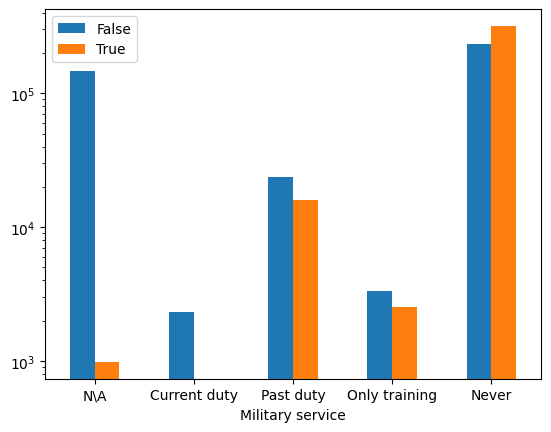

In [14]:
mil_false = [len(false[false['MIL'] == n].index) for n in [0,1,2,3,4]]
mil_true = [len(true[true['MIL'] == n].index) for n in [0,1,2,3,4]]
df = pd.DataFrame({'False': mil_false, 'True': mil_true}, index = ['N\A','Current duty','Past duty','Only training','Never'])
df.plot.bar(rot=0, logy=True, xlabel='Military service')
plt.savefig('mil.png')

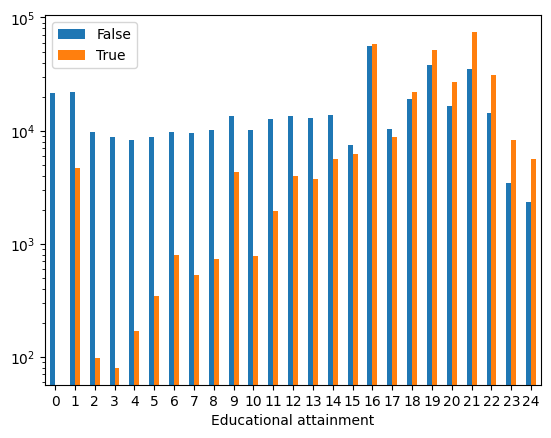

In [15]:
schl_false = [len(false[false['SCHL'] == n].index) for n in range(25)]
schl_true = [len(true[true['SCHL'] == n].index) for n in range(25)]
df = pd.DataFrame({'False': schl_false, 'True': schl_true}, index = range(25))
df.plot.bar(rot=0, logy=True, xlabel='Educational attainment')
plt.savefig('schl.png')
#['N/A','No','Nursery','Kindergarten','G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12','Diploma','GED','<1y college','>1y college','Associate','Bachelor','Master','Professional','Doctorate']

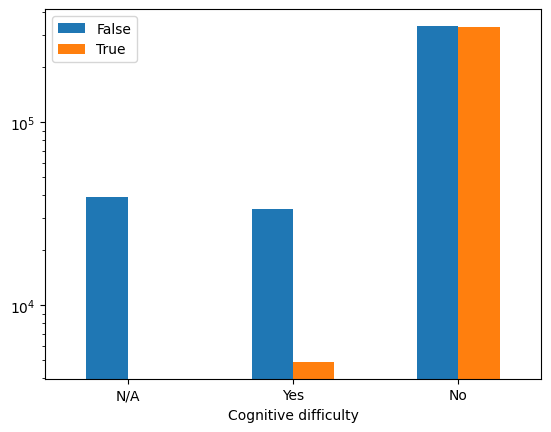

In [16]:
drem_false = [len(false[false['DREM'] == n].index) for n in [0,1,2]]
drem_true = [len(true[true['DREM'] == n].index) for n in [0,1,2]]
df = pd.DataFrame({'False': drem_false, 'True': drem_true}, index = ['N/A','Yes','No'])
df.plot.bar(rot=0, logy=True, xlabel='Cognitive difficulty')
plt.savefig('drem.png')

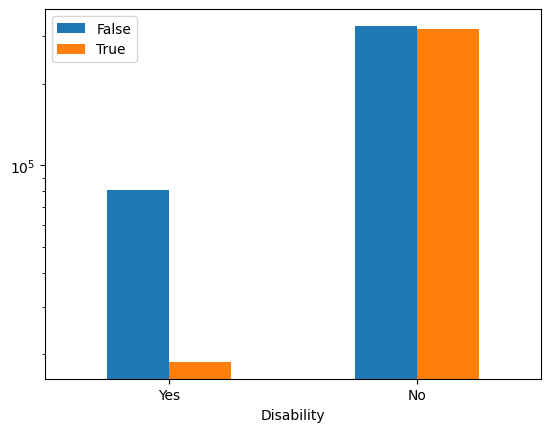

In [17]:
dis_false = [len(false[false['DIS'] == n].index) for n in [1,2]]
dis_true = [len(true[true['DIS'] == n].index) for n in [1,2]]
df = pd.DataFrame({'False': dis_false, 'True': dis_true}, index = ['Yes','No'])
df.plot.bar(rot=0, logy=True, xlabel='Disability')
plt.savefig('dis.png')

# Unsupervised methods

## K-means

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics

First of all, we replace NaN values, which are not accepted by the algorithm.

In [19]:
df = pums.fillna(value=0).drop(columns='ESR')

Then we rescale all values.

In [20]:
scaler = MinMaxScaler()
scaler.fit(df.values)

MinMaxScaler()

In [21]:
s = scaler.transform(df.values)

Now we can fit the model.

In [22]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000)
kmeans.fit(s)

KMeans(max_iter=1000, n_clusters=2, n_init=50)

In [23]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([595582, 150754], dtype=int64))

In [24]:
metrics.davies_bouldin_score(s, kmeans.labels_)

1.465489067185064

In [25]:
arr = pums['ESR'].array
correct = 0.
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == arr[i]:
        correct += 1

frac = correct/len(kmeans.labels_)
print(max(frac, 1-frac))

0.6508677056982377


In [26]:
metrics.adjusted_rand_score(pums['ESR'], kmeans.labels_)

0.0881856325291714

If, instead, we drop all NaN values, we obtain slightly better performance.

In [27]:
df = pums.dropna().drop(columns='ESR')

In [28]:
scaler = MinMaxScaler()
scaler.fit(df.values)
s = scaler.transform(df.values)
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000)
kmeans.fit(s)

KMeans(max_iter=1000, n_clusters=2, n_init=50)

In [29]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([111553, 437499], dtype=int64))

In [30]:
metrics.davies_bouldin_score(s, kmeans.labels_)

1.4493010043115138

In [31]:
arr = pums.dropna()['ESR'].array
correct = 0.
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == arr[i]:
        correct += 1

frac = correct/len(kmeans.labels_)
print(max(frac, 1-frac))

0.6512825743281146


In [32]:
metrics.adjusted_rand_score(pums.dropna()['ESR'], kmeans.labels_)

0.08868083206040737

# Supervised methods

## Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report

First, we have to split the data into a training set and a test set. To mantain the correct proportion between positive and negative instances we use the stratify parameter.

In [34]:
predictors = [col for col in pums.columns if col != 'ESR']
X = pums[predictors].values
y = pums['ESR']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((522435, 15), (223901, 15), (522435,), (223901,))

In [37]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)
clf

DecisionTreeClassifier()

In [38]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

To evaluate the model, let us print the accuracy, the F1-score and the confusion matrix both for training and for test data.

In [39]:
y_pred = clf.predict(X_train)

In [40]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.8921856307483228
F1-score [0.9004454  0.88243128]


In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90    285754
           1       0.87      0.89      0.88    236681

    accuracy                           0.89    522435
   macro avg       0.89      0.89      0.89    522435
weighted avg       0.89      0.89      0.89    522435



In [42]:
confusion_matrix(y_train, y_pred, normalize='true', labels=[1,0])

array([[0.89310929, 0.10689071],
       [0.10857941, 0.89142059]])

In [43]:
y_pred = clf.predict(X_test)

In [44]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred, normalize='true', labels=[1,0])

Accuracy 0.7851863100209467
F1-score [0.80177874 0.76556232]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    122466
           1       0.76      0.77      0.77    101435

    accuracy                           0.79    223901
   macro avg       0.78      0.78      0.78    223901
weighted avg       0.79      0.79      0.79    223901



array([[0.77420023, 0.22579977],
       [0.20571424, 0.79428576]])

### Cross validation

In this case cross validation doe not give useful information.

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [46]:
scores = cross_val_score(clf, X_train, y_train)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7824 (+/- 0.00)
F1-score: 0.7809 (+/- 0.00)


### Complexity

Depth of the tree:

In [47]:
clf.get_depth()

42

Number of leaves:

In [48]:
clf.get_n_leaves()

80927

# SVM

In [49]:
from sklearn import svm
from sklearn.kernel_approximation import Nystroem

In [50]:
pums = pd.read_csv('pums.csv', na_values=['notknown']).dropna()
predictors = [col for col in pums.columns if col != 'ESR']
X = pums[predictors].values
y = pums['ESR']

In [51]:
clf = svm.LinearSVC(dual='auto')
clf

LinearSVC(dual='auto')

Before applying the model, we transform non-linearly the data through the Nystroem kernel approximator.

In [52]:
nystroem = Nystroem(n_components=200)
X_transformed = nystroem.fit_transform(X, y)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

Now we can fit the model.

In [54]:
clf.fit(X_train, y_train)

LinearSVC(dual='auto')

Let us print the classification report and the confusion matrix both for training data and test data.

In [55]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))
confusion_matrix(y_train, y_pred, normalize='true', labels=[1,0])

              precision    recall  f1-score   support

       False       0.83      0.78      0.80    210314
        True       0.75      0.80      0.78    174022

    accuracy                           0.79    384336
   macro avg       0.79      0.79      0.79    384336
weighted avg       0.79      0.79      0.79    384336



array([[0.80257094, 0.19742906],
       [0.2213167 , 0.7786833 ]])

In [56]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred, normalize='true', labels=[1,0])

              precision    recall  f1-score   support

       False       0.83      0.78      0.80     90135
        True       0.75      0.80      0.78     74581

    accuracy                           0.79    164716
   macro avg       0.79      0.79      0.79    164716
weighted avg       0.79      0.79      0.79    164716



array([[0.80259047, 0.19740953],
       [0.22121263, 0.77878737]])